# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data from CSV

In [4]:
# Puts data into a data frame that includes rows and columns 
salaries = pd.read_csv("SalaryData.csv")

# Looking at Data

In [5]:
# Printing the columns and data types 
salaries.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
# Printing the first 5 rows of data
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Giving summary stats for data in the table 
# If there is a significant differnece between median and mean there could be outliers 
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# Giving summary stats for the table it self
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# Counting the missing values (null values) in each column
salaries.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
# Displaying the rows that contain any null values
# Simply returns the boolean of if there is a null value
# Axis = 0 means columns, axis = 1 is rows
salaries.isnull().any(axis = 1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [13]:
# Actually displays the rows that have null values
salaries[salaries.isnull().any(axis = 1)]

,YearsExperience,Salary


# Visualizing the data

In [20]:
# Setting the color and the style of the plots
sns.set_palette("Blues_d")
sns.set_style("darkgrid")

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

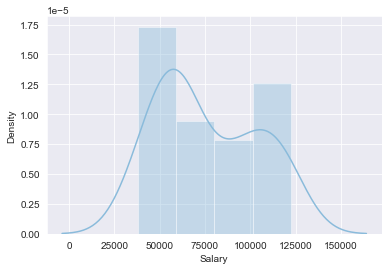

In [22]:
# Shows a distribution plot of the salary (dependent) variable
sns.distplot(salaries["Salary"])

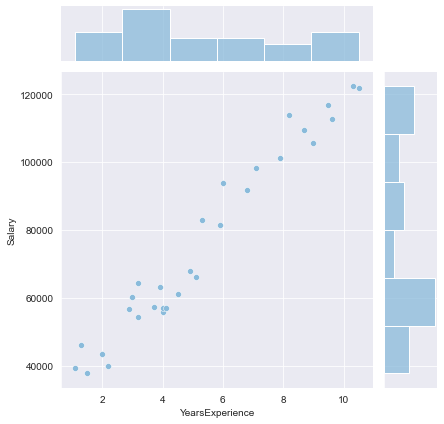

In [23]:
# Shows a scatter plot that demonstrates the relationship between years experience (independent) and salary(depdendent)
sns.jointplot(x = "YearsExperience", y = "Salary", data = salaries)

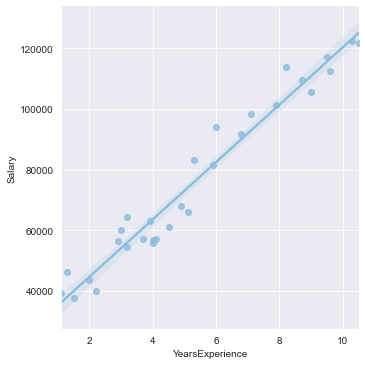

In [24]:
# Creating a scatter plot with a regression line in the data
sns.lmplot(x = "YearsExperience", y = "Salary", data = salaries)

# Setting the X and Y variables 

In [25]:
y = salaries['Salary']

In [26]:
# 2D Array of indendent variables
X = salaries[['YearsExperience']]

# Partitioning the Data

In [27]:
# Importing the splitting function from sklearn library
from sklearn.model_selection import train_test_split

In [28]:
# Splitting the data into training and testing data sets,
# Testing data includes 50% of datapoitns 
# Pseudo random, random state int will always split the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [29]:
print(X_train)
print(y_train)

    YearsExperience
1               1.3
18              5.9
14              4.5
19              6.0
21              7.1
2               1.5
20              6.8
10              3.9
16              5.1
15              4.9
23              8.2
7               3.2
3               2.0
24              8.7
8               3.2
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64


In [ ]:
print(len())